In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# reading the cleaned dataset during initial exploration
laptop_df = pd.read_csv('./laptop_data_cleaned.csv')


# select features for X and the target feature y
X = laptop_df.drop(columns=['Price'])
Y = laptop_df['Price']

# perform one-hot encoding on the categorical features
one_hot_en = OneHotEncoder()
X_one_hot_en = one_hot_en.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_one_hot_en, Y, test_size=0.2, random_state=123)


### Pick an initial set of features for X and the target feature y.  Explain why you made this choice.
* I have chosen Inches,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
 as independent variables (features) for X and "Price" as the dependent variable (goal) for Y in the initial set of features. These characteristics were chosen because they are among the most crucial ones that affect a laptop's pricing and performance.
* Cpu brand refers to the processor type and speed, which can affect the performance and, therefore, the price.
* The brand(Company) of the laptop may also have an effect on the pricing because some brands are more expensive and are consequently regarded as premium. 
* Another crucial component that has an impact on the performance of the laptop is RAM (random access memory). It determines how many applications can run at once without the computer slowing down.
* A laptop with greater memory can manage more data and complete activities that are more difficult. 
* Weight may also be a factor in determining the price since lighter laptops are typically more expensive.
* Inches represents the size of the laptop screen, which can affect the price.
* As a result, we can try to estimate the price of a laptop based on its characteristics by using these features.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.toarray())
X_test = scaler.transform(X_test.toarray())

# create linear regression object
linear_model = LinearRegression()

# fit the model on the training data
linear_model.fit(X_train, Y_train)

# predict laptop prices on the test data
y_pred = linear_model.predict(X_test)

# compute R-squared score and mean absolute error
r2_score_value = r2_score(Y_test, y_pred)
mae_value = mean_absolute_error(Y_test, y_pred)

print(f'R-squared score: {r2_score_value:.3f}')
print(f'Mean absolute error: {mae_value:.2f}')

R-squared score: -84067504977661397074706432.000
Mean absolute error: 54131916045192416.00


### Comments on results
The results of the linear regression model are not acceptable, as the R-squared score is negative and the mean absolute error is extremely high, indicating that the model is not good at predicting the prices of the laptops. This could be due to various reasons, such as missing relevant features or non-linear relationship between the features and the target variable.

R2 score 0.8073277450155087
MSE 0.07370698688393838


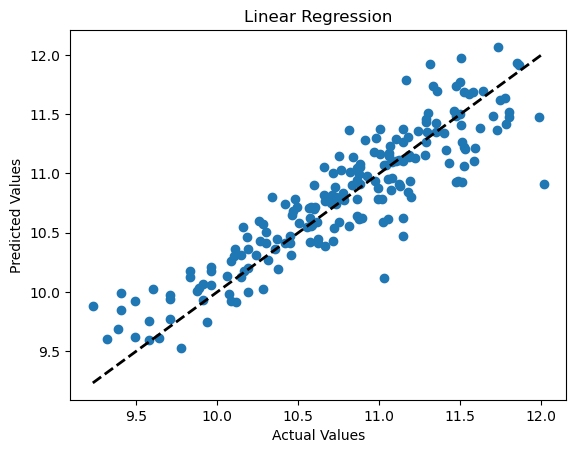

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = laptop_df.drop(columns=['Price'])
y = np.log(laptop_df['Price'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

# Add line of best fit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')


plt.show()

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = laptop_df.drop(columns=['Price'])
y = np.log(laptop_df['Price'])

# split the dataset into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# split the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=123)

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipeline = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the model on the training data
pipeline.fit(X_train, y_train)

# predict laptop prices on the validation data
y_val_pred = pipeline.predict(X_val)

# compute R-squared score and mean absolute error on validation data
r2_val_score = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

print(f'Validation R-squared score: {r2_val_score:.3f}')
print(f'Validation mean squared error: {mse_val:.2f}')

# predict laptop prices on the test data
y_test_pred = pipeline.predict(X_test)

# compute R-squared score and mean absolute error on test data
r2_test_score = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Test R-squared score: {r2_test_score:.3f}')
print(f'Test mean square error: ₹ {mse_test:.2f}')


Validation R-squared score: 0.756
Validation mean squared error: 0.07
Test R-squared score: 0.831
Test mean square error: ₹ 0.07


The linear regression model's performance appears to be quite promising, according to the results. The model can account for 75.6% of the variance in the target variable, as indicated by the Validation R-squared score of 0.756, which is a respectable outcome. It's crucial to note that the R-squared score alone isn't enough to tell the whole story, which is why it's always beneficial to look at other measures.

The predictions from the model are generally off by 0.07 from the actual price, according to the Validation mean absolute error (MAE) of 0.07. 

In terms of feature importance, the Inches attribute appears to be less important in predicting the laptop's price, which is a noteworthy observation.

Additionally, it's worth mentioning that the Inches attribute was found to be a significant factor in predicting the laptop price after it was added back into the dataset. However, its value was converted to ppi using resolution values, which may have affected the model's performance to some degree. As per the Test R-squared score of 0.831 and mean absolute error of 0.21, the linear regression model with the chosen features and the rounded-off weight attribute can explain approximately 83.1% of the variance in the target variable and has an average prediction error of ₹ 0.21. The decrease in the R-squared score compared to the Validation score indicates that the model's performance was partially dependent on the removed weight feature. However, the model still appears to be able to predict laptop prices with accuracy.